In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import json
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import matplotlib.pyplot as plt

# Convert the json data in string (transformed by the pd.read_csv) to string 

In [265]:
def load_json_field(bad_json):
    regex = r"\w\'\w"
    subst = ""
    bad_json = re.sub(regex, subst, bad_json)
    bad_json = bad_json.replace("d' Arrouzat", "darrouzat")
    good_json = bad_json.replace("\'", "\"").replace("None", "null").replace("True", "true").replace("False", "false")
    
    return json.loads(good_json)

In [266]:
data = pd.read_csv("../bpideep/rawdata/data2020-12-03.csv")
data["team"] = data["team"].apply(load_json_field)
data["industries"] = data["industries"].apply(load_json_field)
data["investors"] = data["investors"].apply(load_json_field)
data["fundings"] = data["fundings"].apply(load_json_field)

# Import data + data cleaning thanks to info retrieved from Linkedin

## DATA CLEANING

In [398]:
def impute_missing_launch_year(data):

    names = ['Amypore',
             'Kinnov Therapeutics',
             'Lipofabrik',
             'Step pharma',
             'LiMM Therapeutics',
             'Ilek',
             'LysPackaging',
             'TexiSense',
             "Institut de Prise en Charge de l'Obésité",
             'Izi Family',
             'Arthur Dupuy',
             'Gen.Orph',
             'Uniris',
             'NANOZ',
             'Akwatyx',
             'Black-line',
             'Eyye',
             "O'Sol",
             'Treenox',
             'Aqualeg',
             'Co-assit',
             'Wind my roof',
             'APPARTOO',
             'BimBamJob',
             'Buddytherobot.com',
             'Bcm',
             'CCI Paris Ile de France',
             'Datarocks',
             'EFFICIENCIA',
             'EONEF',
             'FEALINX',
             'INERIS',
             'Marguerite',
             'TokTokDoc',
             'Novaquark',
             'Peopeo',
             'Sloclap',
             'Swift',
             'Sword',
             'XT-VISION',
             'Ryax',
             'Sylha',
             'Opta LP']

    # inserting missing launch year and month for the 33 companies with fundraising
    launch_years = [2018, 2015, 2012, 2014, 2018, 2016, 2015, 2010, 2011, 2016, 2015, 
                   2012, 2017, 2012, 2015, 2017, 2016, 2016, 2018, 2011, 2016, 2018, 2015, 2015, 2014, 2014, 2013,
                   2014, 2012, 2016, 1997, 1990, 2012, 2016, 2014, 2017, 2015, 1973, 2000, 2011, 2017, 2019, 2013]

    zipbObj = zip(names, launch_years)
    launch_year_dict = dict(zipbObj)

    data["launch_year_clean"] = data['launch_year']
    
    for name, year in launch_year_dict.items() : 
        data.loc[data.name == name, "launch_year_clean"] = year
    return data

def get_growth_dict(df):
    table = df[["growth_stage", "launch_year_clean", "id"]].groupby(by=["launch_year_clean", "growth_stage"]).count()
    column = list(table.unstack(level = -1).columns)
    growth_dict = table.unstack(level = -1).fillna(0).apply(lambda x: column[x.argmax()][1], axis = 1).to_dict()
    
    return growth_dict
    

def fill_missing_growth(growth_dict, growth_stage, launch_year_clean):
   
    if type(growth_stage) == str:
        return growth_stage    
    elif launch_year_clean in growth_dict:
        return growth_dict[launch_year_clean]
    else:
        return growth_stage
    
    
def load_json_field(bad_json):
    regex = r"\w\'\w"
    subst = ""
    bad_json = re.sub(regex, subst, bad_json)
    bad_json = bad_json.replace("d' Arrouzat", "darrouzat")
    good_json = bad_json.replace("\'", "\"").replace("None", "null").replace("True", "true").replace("False", "false")
    
    return json.loads(good_json)


def get_industries(x):
    '''
    function that extracts info from 'industries' column through mapping
    data['industries_list'] = data['industries'].map(lambda x: industries(x))
    '''
    industries_list = []
    
    industries = x.apply(load_json_field)

    for u in range(len(industries)):
        if len(industries[u]) > 0:
            industries_list.append(industries[u][0]['name'])
        else:
            industries_list.append("")
    return industries_list

def get_health(x):
    
    industries = get_industries(x) # list of industries

    health_industry = []
    
    for element in industries:
        if element == 'health':
            health_industry.append(1)
        else:
            health_industry.append(0)
    return health_industry

In [399]:
tmp = pd.read_csv("../bpideep/rawdata/data2020-12-03.csv")

## TEST cleaning

In [24]:

tmp = pd.read_csv("../bpideep/rawdata/data2020-12-03.csv")
tmp.drop(tmp[(tmp.id == 1787891) | (tmp.id == 1893232)].index, inplace = True)

tmp[tmp.growth_stage.isna()].shape


(36, 94)

In [ ]:
impute_missing_launch_year(tmp)

In [ ]:
tmp['growth_stage_imputed'] = tmp.apply(lambda row: fill_missing_growth(dico,
                row['growth_stage'], 
                row['launch_year_clean']), 
            axis=1
        )
        


tmp[(tmp.growth_stage_imputed.isna())].to_csv("missing_launchyear_growthstage.csv")

In [ ]:
missing_list = list(tmp[(tmp.growth_stage_imputed.isna())]["name"])

In [ ]:
missing_list

In [ ]:
missing_years = [2012, 2017, 2012, 2015, 2017, 2016, 2016, 2018, 2011, 2016, 2018, 2015, 2015, 2014, 2014, 2013]

In [ ]:
tmp[(tmp.growth_stage_imputed.isna())]

In [ ]:
tmp['growth_stage_imputed']

## GET_DATA

In [404]:
class GetData():

    def get_data():
        data = pd.read_csv("../bpideep/rawdata/data2020-12-03.csv")
        
#         data["industries"] = data["industries"].apply(load_json_field)
        
        #selection of need columns
        data = data[["id", "name", "target", "deep_or_not", "total_funding_source", "employees",
                     "employees_latest", "launch_year", "growth_stage", "linkedin_url", "industries"]]
        
        #Health industry detection 
        data["health_industry"] = pd.DataFrame(get_health(data["industries"]))
    
        #imputing the missing launch year (only 33 done manually -> to be automatized if a new source displays it)
        #LAUNCH_YEAR_CLEAN
        impute_missing_launch_year(data)
        
        
        
        # drop 2 duplicated companies Lalilo and Pixyl*
        data.drop(data[(data.id == 1787891) | (data.id == 1893232)].index, inplace = True)
        
        # change the "not meaningful" growth stage status of 15789 Insoft to mature
        data.loc[data.id == 15789, "growth_stage"] = "mature"
        
        
        #imputing missing growth_stage (mode of the launch year)
        #GROWTH_STAGE_IMPUTED
        growth_table = get_growth_dict(data)
        
#         import ipdb ; ipdb.set_trace()
        data['growth_stage_imputed'] = data.apply(lambda row: fill_missing_growth(
                growth_table,
                row['growth_stage'], 
                row['launch_year_clean']), 
            axis=1
        )
        
        
        
        #imputing missing employees values from LinkedIn scraping
        #EMPLOYEES_CLEAN
        missing = pd.read_csv("../bpideep/data/missing_employee_count.csv")
        data["employees_clean"] = data.employees_latest
        data.loc[data.name == "CCI Paris Ile de France", "employees_clean"] = 1793

        for url in missing.linkedin_url:
            replace_value = missing[missing.linkedin_url == url]["check"].iloc[0]
            data.loc[data.linkedin_url == url, "employees_clean"] = replace_value
        
        #computing the age of companies
        data["age"] = 2020 - data.launch_year_clean
        
        
        # get the number of patents
        patent = pd.read_csv("../bpideep/data/patents.csv")
        data = pd.merge(data, patent, on= ["id", "id"], how = "left")
        
        return data

#         *    
#                 + 3 duplicated names but with different id : 
#                     1/ Lalilo : 926521 (http://www.lalilo.com/) vs. 1787891 (http://lalilo.fr) 
#             -> same launch date, french website no longer exists + observation  almost filled by NAN + same obs as the .com 
#             -> drop the french Lalilo (1787891)
#                     2/ Pixyl : 892048 vs 1893232 (different websites mentioned but same website page when launched) 
#             -> kept  892048 because more info + the Dealroom profile was verified by Dealroom team on Sept, 1st 2020 vs. pending verification
#                     3/ NANOZ : 1836121 vs 1660543 -> kept both as different companies but the second one is German 

In [518]:
data = GetData.get_data()
X = data.drop(columns = ["target", "deep_or_not"])
y = data.target
y[y ==0.5] = 0

<ipython-input-518-7faf0755a962>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## TEST

In [ ]:
data = GetData.get_data()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data[(data.employees.notna()) & (data.employees_clean.isna())].shape

présence de math.nan ?

In [ ]:
data[(data.employees.isna()) & (data.employees_clean.isna())]

In [ ]:
res = replace_employees(data)

In [ ]:
res[res.employees_imputed.isna()][["name", "employees_latest", "employees", "employees_clean", "employees_imputed", "launch_year_clean"]].groupby(by = "launch_year_clean").count()

In [ ]:
res[(res.employees_imputed.isna()) & (res.launch_year_clean < 2010)][["name", "employees_latest", "employees", "employees_clean", "employees_imputed", "launch_year_clean"]].groupby(by = "launch_year_clean").count()

In [ ]:
yg_median = res[["employees_imputed", "launch_year_clean"]].groupby(by=["launch_year_clean"]).median()
years = data.launch_year_clean.unique()
years = [nb for nb in years if nb >= 2010]

print(yg_median)


for year in years:
    replace_value = yg_median.loc[(year)][0]
    boolean_condition = ((res.launch_year_clean == year) & (res.employees_imputed.isna()))
    res.loc[boolean_condition, "employees_imputed"] = replace_value


In [ ]:
res[res.employees_imputed.isna()][["name", "employees_latest", "employees", "employees_clean", "employees_imputed", "launch_year_clean"]].groupby(by = "launch_year_clean").count()

In [ ]:
#median_bef_2010 
res[res.launch_year_clean < 2010][["employees_imputed"]].median()

In [ ]:
res[res.launch_year_clean.notna()][["employees_imputed"]].median()

# PIPELINE

##### employees imputing  : age

In [10]:
import re
import math
from sklearn.base import BaseEstimator, TransformerMixin


def average_list(range_list):
    return sum(range_list)/len(range_list)

def compute_employees_mean(data):
    range_list = list(data.employees.unique())
    try:
        range_list.remove("n.a.")
    except:
        pass
    keys_list = []
    means_list = []

    for i in range(len(range_list)) :
        if type(range_list[i]) == str :
            temp = re.findall(r'\d+', range_list[i]) 
            res = list(map(int, temp)) 
            mean = average_list(res)
            means_list.append(mean)
            keys_list.append(range_list[i])
        else:
            pass

    zip_iterator = zip(keys_list, means_list)
    range_dict = dict(zip_iterator)
    
    return range_dict

def replace_employees(df):
#     import ipdb ; ipdb.set_trace()
    dictionary = compute_employees_mean(df)
    for key, value in dictionary.items():
        df.loc[(df.employees == key) & (df.employees_latest.isna()), "employees_clean"] = value
    return df
            
            
class EmployeeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        
        # impute according to the range mean
#         import ipdb ; ipdb.set_trace()
        data = X.copy()
        data = replace_employees(data)
#         print(data)
        
        
        self.yg_median = data[["employees_clean", "launch_year_clean"]].groupby(by=["launch_year_clean"]).median()
#         print(self.yg_median)
        self.years = data.launch_year_clean.unique()
        self.years = [nb for nb in self.years if nb >= 2010]
#         print(self.years)
        
#        print(self.yg_median)
        return self
    
    def transform(self, X, y=None):
#         import ipdb ; ipdb.set_trace()
        X = replace_employees(X)
#         print(X)
        
        # impute according to the median of the companies launched after 2010
        for year in self.years:
            replace_value = self.yg_median.loc[(year)][0]
            boolean_condition = ((X.launch_year_clean == year) & (X.employees_clean.isna()))
            X.loc[boolean_condition, "employees_clean"] = replace_value
        
#         print("after loop : ", X)
        
        median_all_dataset = X[X.launch_year_clean.notna()][["employees_clean"]].median()
#         print(X.employees_imputed.isna())
        X.loc[X.employees_clean.isna(), "employees_clean"] = replace_value

        return X
    
    



##### TEST

In [521]:
e = EmployeeImputer()

##### Patent_transformer

In [11]:
from sklearn.pipeline import make_pipeline

patent_transformer = make_pipeline(
                                SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0),
                                RobustScaler())
    
### ROBUSTSCALER or log(1+x) ??

##### Ratio_transformer  : funding / employees ratio

In [12]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

funding_employees_ratio_constructor = FunctionTransformer(
    lambda df: pd.DataFrame(df["total_funding_source"] / df["employees_clean"]))


In [13]:
from sklearn.pipeline import Pipeline

ratio_transformer = Pipeline([
    ("imputer1", EmployeeImputer()),
    ("ratio", funding_employees_ratio_constructor),
    ("scaler",  RobustScaler())
])

##### Growth_transformer

###### Age imputer

In [156]:
age_imputer = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))

###### Growth stage Transformer (1-4)

In [178]:
dictionary = {'mature' : 4, 'late growth' : 3,'early growth' : 2, 'seed' : 1}


growth_stage_transformer = FunctionTransformer(
    lambda df: df[['growth_stage_imputed']].applymap(lambda x: dictionary[x]))


In [180]:
growth_stage_age_preparator = ColumnTransformer([
    ["age_imputer", age_imputer, ["age"]],
    ["growth_stage_transformer", growth_stage_transformer, ["growth_stage_imputed"]],
])

###### Growth_stage_age_ratio

In [250]:
def compute_growth_age_ratio(arr):
#     import ipdb ; ipdb.set_trace()
    arr[arr[:,0]== 0, 0] = 1
    return np.expand_dims(arr[:,1]/arr[:,0], -1)

growth_stage_age_ratio_constructor = FunctionTransformer(compute_growth_age_ratio)


In [242]:
growth_transformer = Pipeline([
    ["growth_stage_age_preparator", growth_stage_age_preparator], 
    ["growth_stage_age_ratio_constructor", growth_stage_age_ratio_constructor],
])

##### Health industry 

In [444]:
class NoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

NoTransformer = ColumnTransformer([
    ["identity_transformer", NoTransformer(), ["health_industry"]]
])

##### Preprocessor

In [445]:
from sklearn import set_config; set_config(display='diagram')
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("growth_transformer", growth_transformer, ["growth_stage_imputed", "age"]),
    ("ratio_transformer", ratio_transformer, ["employees_clean", "employees", "launch_year_clean", "employees_latest", "total_funding_source"]),
    ("patent_transformer", patent_transformer, ["nb_patents"]),
    ("identity", NoTransformer, ["health_industry"])
    ])

##### Pipeline

In [446]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipemodel = Pipeline(steps=[
                            ('features', preprocessor),
                            ('model', LogisticRegression(C = 1.52, penalty = 'l1', solver= 'liblinear'))
                             ])
pipemodel

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('growth_transformer',
                                                  Pipeline(steps=[('growth_stage_age_preparator',
                                                                   ColumnTransformer(transformers=[['age_imputer',
                                                                                                    Pipeline(steps=[('simpleimputer',
                                                                                                                     SimpleImputer())]),
                                                                                                    ['age']],
                                                                                                   ['growth_stage_transformer',
                                                                                                    FunctionTransformer(func=<function <lambda> at 0x11d591700>),
                                                                                                    ['growth_stage_imputed']]])...
                                                 ('patent_transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['nb_patents']),
                                                 ('identity',
                                                  ColumnTransformer(transformers=[['identity_transformer',
                                                                                   NoTransformer(),
                                                                                   ['health_industry']]]),
                                                  ['health_industry'])])),
                ('model',
                 LogisticRegression(C=1.52, penalty='l1', solver='liblinear'))])

##### RUN MODEL

In [447]:
data = GetData.get_data()
X = data.drop(columns = ["target", "deep_or_not"])
y = data.target
y[y ==0.5] = 0

<ipython-input-447-7faf0755a962>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y ==0.5] = 0


In [448]:
pipemodel.fit(X, y)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('growth_transformer',
                                                  Pipeline(steps=[('growth_stage_age_preparator',
                                                                   ColumnTransformer(transformers=[['age_imputer',
                                                                                                    Pipeline(steps=[('simpleimputer',
                                                                                                                     SimpleImputer())]),
                                                                                                    ['age']],
                                                                                                   ['growth_stage_transformer',
                                                                                                    FunctionTransformer(func=<function <lambda> at 0x11d591700>),
                                                                                                    ['growth_stage_imputed']]])...
                                                 ('patent_transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['nb_patents']),
                                                 ('identity',
                                                  ColumnTransformer(transformers=[['identity_transformer',
                                                                                   NoTransformer(),
                                                                                   ['health_industry']]]),
                                                  ['health_industry'])])),
                ('model',
                 LogisticRegression(C=1.52, penalty='l1', solver='liblinear'))])

In [449]:
from sklearn.model_selection import cross_validate

# Cross validate pipeline
cv_result = cross_validate(pipemodel, X, y, cv=10, scoring=["accuracy", "recall", "f1", "precision"])

In [450]:
scoring=["test_accuracy", "test_recall", "test_f1", "test_precision"]

for metric in scoring:
    print(f"{metric} : {cv_result[metric].mean() * 100 : .2f}%")

test_accuracy :  69.82%
test_recall :  51.40%
test_f1 :  58.98%
test_precision :  69.88%


1st run with 3 features only : test_accuracy :  65.12%
test_recall :  32.10%
test_f1 :  43.24%
test_precision :  69.23%


2nd run with "health_industry" : test_accuracy :  69.82%
test_recall :  51.40%
test_f1 :  58.98%
test_precision :  69.88%

In [561]:
pd.set_option('display.max_rows', 500)
features = ["growth_stage_age_ratio", "funding_employees_ratio", "nb_patents", "health_industry"]

In [466]:
y_pred = pipemodel.predict(X)
xp = preprocessor.fit_transform(X)
y_pred = pd.DataFrame(y_pred, columns = ["y_pred"])
x_prepro = pd.DataFrame(xp, columns = features)

In [551]:
outputs = data[["id", "name", "deep_or_not", "target"]].join(x_prepro).join(y_pred)

In [556]:
FN = outputs[(outputs.deep_or_not == "deeptech") & (outputs.y_pred == 0)]
FP = outputs[(outputs.deep_or_not == "non_deeptech") | (outputs.deep_or_not == "almost_deeptech") & (outputs.y_pred == 1)]
FN = outputs[(outputs.deep_or_not == "deeptech") & (outputs.y_pred == 0)]


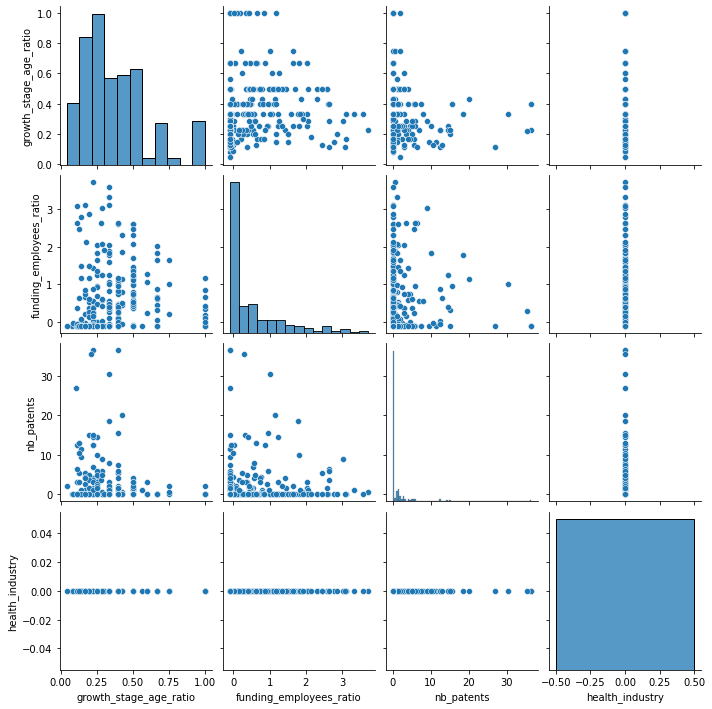

In [570]:
import seaborn as sns
sns.pairplot(FN[features])

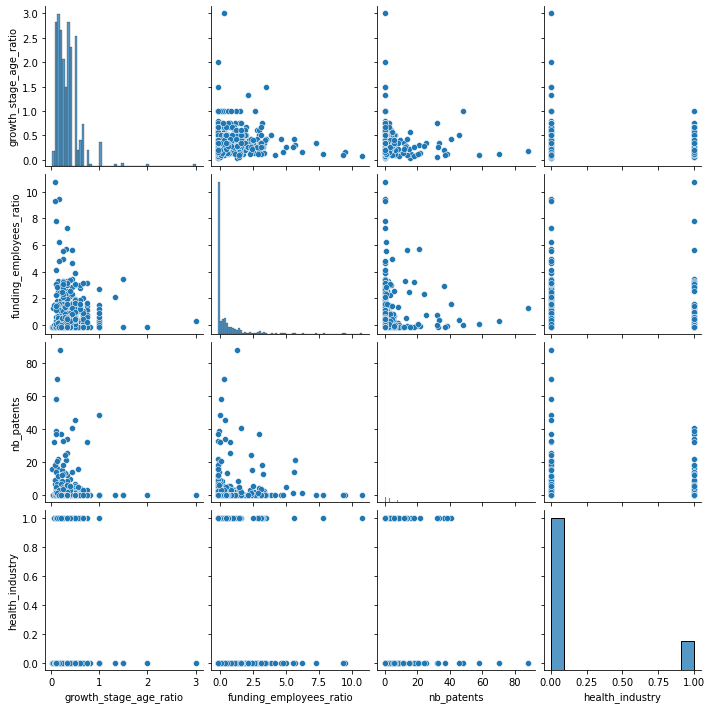

In [566]:
sns.pairplot(FP[features])

In [500]:
from pandasgui import show
show(outputs)